In [23]:
import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

df = pd.read_csv('coincident_peaks.csv')
df

,Coincident_hour,Year,Month,day_of_month,week_of_year,day_of_year,day_of_week
0,17,2006,12,18,51,353,4
1,17,2006,11,28,48,333,7
2,17,2006,10,30,44,304,2
3,15,2006,9,7,36,251,7
4,14,2006,8,8,32,221,1
...,...,...,...,...,...,...,...
176,10,2020,4,1,14,92,1
177,11,2020,3,13,11,73,6
178,17,2020,2,3,6,34,3
179,17,2020,1,14,3,14,7


In [24]:
df.dtypes

Coincident_hour    int64
Year               int64
Month              int64
day_of_month       int64
week_of_year       int64
day_of_year        int64
day_of_week        int64
dtype: object

In [25]:
df['year_number'] = df['Year'] - 2005
df

,Coincident_hour,Year,Month,day_of_month,week_of_year,day_of_year,day_of_week,year_number
0,17,2006,12,18,51,353,4,1
1,17,2006,11,28,48,333,7,1
2,17,2006,10,30,44,304,2,1
3,15,2006,9,7,36,251,7,1
4,14,2006,8,8,32,221,1,1
...,...,...,...,...,...,...,...,...
176,10,2020,4,1,14,92,1,15
177,11,2020,3,13,11,73,6,15
178,17,2020,2,3,6,34,3,15
179,17,2020,1,14,3,14,7,15


In [27]:
df_validation = df.iloc[df.shape[0]-25:df.shape[0]]
df_training   = df.iloc[0:df.shape[0]-24]

In [28]:
df_training

,Coincident_hour,Year,Month,day_of_month,week_of_year,day_of_year,day_of_week,year_number
0,17,2006,12,18,51,353,4,1
1,17,2006,11,28,48,333,7,1
2,17,2006,10,30,44,304,2,1
3,15,2006,9,7,36,251,7,1
4,14,2006,8,8,32,221,1,1
...,...,...,...,...,...,...,...,...
152,8,2018,4,5,14,95,5,13
153,18,2018,3,5,10,64,5,13
154,18,2018,2,5,6,36,5,13
155,17,2018,1,11,2,11,4,13


In [30]:
#Create the training and testing data sets.
np.random.seed(0)
mask = np.random.rand(len(df_training)) < 0.85
df_train = df_training[mask]
df_test = df_training [~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

Training data set length=136
Testing data set length=21


In [41]:
#Setup the regression expression in patsy notation. We are telling patsy that BB_COUNT is our dependent variable and
# it depends on the regression variables: DAY, DAY_OF_WEEK, MONTH, HIGH_T, LOW_T and PRECIP.
#expr = """Coincident_hour ~ Year  + Month + day_of_month + week_of_year + day_of_year +  day_of_week """
#expr = """Coincident_hour ~ year_number + Month + day_of_month + week_of_year + day_of_year +  day_of_week """

expr = """Coincident_hour ~ year_number + Month"""

#Set up the X and y matrices
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

#Using the statsmodels GLM class, train the Poisson regression model on the training data set.
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

#Print the training summary.
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        Coincident_hour   No. Observations:                  136
Model:                            GLM   Df Residuals:                      133
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -336.24
Date:                Mon, 15 Feb 2021   Deviance:                       45.575
Time:                        16:08:12   Pearson chi2:                     42.5
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.8044      0.060     46.882      

In [57]:
X_test

,Intercept,year_number,Month
7,1.0,1.0,5.0
8,1.0,1.0,4.0
13,1.0,2.0,11.0
19,1.0,2.0,5.0
20,1.0,2.0,4.0
27,1.0,3.0,9.0
38,1.0,4.0,10.0
52,1.0,5.0,8.0
70,1.0,6.0,2.0
72,1.0,7.0,12.0


In [42]:
#Make some predictions on the test data set.
poisson_predictions = poisson_training_results.get_prediction(X_test)
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

          mean   mean_se  mean_ci_lower  mean_ci_upper
7    16.241207  0.675730      14.969362      17.621112
8    16.290572  0.703811      14.967917      17.730105
13   15.920699  0.730666      14.551139      17.419162
19   16.213259  0.598830      15.081050      17.430469
20   16.262539  0.630303      15.072924      17.546043
27   15.990065  0.565461      14.919318      17.137658
38   15.914178  0.560356      14.852942      17.051239
52   15.983515  0.417305      15.186187      16.822706
70   16.249220  0.572709      15.164624      17.411388
72   15.736358  0.626436      14.555242      17.013318
89   15.949476  0.357607      15.263756      16.666001
103  16.018967  0.421297      15.214161      16.866345
109  15.702844  0.605675      14.559505      16.935969
116  16.040007  0.513428      15.064623      17.078544
118  16.137662  0.638451      14.933607      17.438798
122  15.723470  0.593989      14.601328      16.931850
140  15.984852  0.635836      14.785976      17.280934
143  16.13

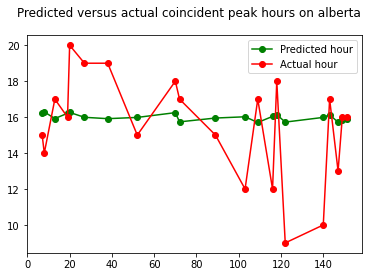

In [43]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['Coincident_hour']

#Mlot the predicted counts versus the actual counts for the test data.
fig = plt.figure()
fig.suptitle('Predicted versus actual coincident peak hours on alberta')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted hour')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual hour')
plt.legend(handles=[predicted, actual])
plt.show()

<Figure size 432x288 with 0 Axes>

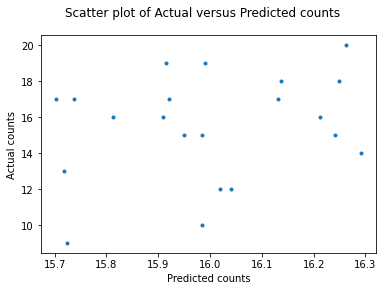

In [44]:
#Show scatter plot of Actual versus Predicted counts
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

In [52]:
df_test['prediction_mean'] = predictions_summary_frame['mean']
df_test['prediction_mean'] = df_test['prediction_mean'].apply(np.ceil)
df_test['prediction_mean_ci_upper'] = predictions_summary_frame['mean_ci_upper']
df_test['prediction_mean_ci_upper'] = df_test['prediction_mean_ci_upper'].apply(np.ceil)
df_test.loc[df_test['prediction_mean'] - df['Coincident_hour'] == 0, 'is_accurate'] = 1 
df_test.loc[df_test['prediction_mean'] - df['Coincident_hour'] != 0, 'is_accurate'] = 0

/Users/abulhasanfahad/opt/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/abulhasanfahad/opt/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/abulhasanfahad/opt/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [53]:
df_test

,Coincident_hour,Year,Month,day_of_month,week_of_year,day_of_year,day_of_week,year_number,prediction_mean,prediction_mean_ci_upper,is_accurate
7,15,2006,5,18,20,139,4,1,17.0,18.0,0.0
8,14,2006,4,28,17,119,7,1,17.0,18.0,0.0
13,17,2007,11,29,48,334,1,2,16.0,18.0,0.0
19,16,2007,5,31,22,152,3,2,17.0,18.0,0.0
20,20,2007,4,4,14,95,4,2,17.0,18.0,0.0
27,19,2008,9,29,40,274,1,3,16.0,18.0,0.0
38,19,2009,10,13,42,287,6,4,16.0,18.0,0.0
52,15,2010,8,26,35,239,5,5,16.0,17.0,0.0
70,18,2011,2,28,10,60,7,6,17.0,18.0,0.0
72,17,2012,12,10,50,346,3,7,16.0,18.0,0.0


In [54]:
df_validation.columns

Index(['Coincident_hour', 'Year', 'Month', 'day_of_month', 'week_of_year',
       'day_of_year', 'day_of_week', 'year_number'],
      dtype='object')

In [62]:
input_df = pd.DataFrame(df_validation, columns = ['year_number', 'Month'])
input_df['Intercept'] = 1
input_df = pd.DataFrame(input_df, columns =['Intercept','year_number', 'Month'])
output_df = poisson_training_results.get_prediction(input_df)
output_df = output_df.summary_frame()
df_validation['prediction_mean'] = output_df['mean']
df_validation['prediction_mean'] = df_validation['prediction_mean'].apply(np.ceil)
df_validation.loc[df_validation['prediction_mean'] - df_validation['Coincident_hour'] == 0, 'is_accurate'] = 1 
df_validation.loc[df_validation['prediction_mean'] - df_validation['Coincident_hour'] != 0, 'is_accurate'] = 0
df_validation

/Users/abulhasanfahad/opt/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/abulhasanfahad/opt/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/abulhasanfahad/opt/anaconda3/envs/ml/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

,Coincident_hour,Year,Month,day_of_month,week_of_year,day_of_year,day_of_week,year_number,prediction_mean,is_accurate
156,17,2019,12,9,50,343,2,14,16.0,0.0
157,17,2019,11,27,48,331,6,14,16.0,0.0
158,18,2019,10,28,44,301,7,14,16.0,0.0
159,17,2019,9,3,36,246,3,14,16.0,0.0
160,15,2019,8,2,31,214,2,14,16.0,0.0
161,16,2019,7,23,30,204,2,14,16.0,1.0
162,14,2019,6,13,24,164,6,14,16.0,0.0
163,16,2019,5,29,22,149,1,14,16.0,1.0
164,17,2019,4,18,16,108,4,14,16.0,0.0
165,18,2019,3,6,10,65,6,14,16.0,0.0


In [67]:
sum(df_validation['is_accurate']) /df_validation.shape[0]

0.32

In [21]:
'''
expr = """Coincident_hour ~ year_number + Month + day_of_month + week_of_year + day_of_year +  day_of_week """
'''
prediction_input = np.array([1, 15,2,15,8,46,2])
out = poisson_training_results.get_prediction(prediction_input)
out.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper
0,15.757666,0.984625,13.941329,17.810642
